<a href="https://colab.research.google.com/github/Georgia-MAX-holic/R6_data_stduy/blob/main/R6_result_pyspark/R6_ML%26data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
#!pip install pyspark
#!pip install category_encoders

In [366]:
import pyspark
from pyspark.sql import SparkSession
from google.colab import drive
from category_encoders import OneHotEncoder
spark=SparkSession.builder.appName("R6_study").getOrCreate()

In [367]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [368]:
path = '/content/gdrive/MyDrive/cpding/asdf/레식 데이터.csv'


In [369]:
df_spark=spark.read.option("header","true").csv(path, inferSchema=True)

In [370]:
class spark :
  
  def __init__(self, df):   
    self.df = df

  def make_ratio_Column(self , name , numerator , denominator):

    self.df = self.df.withColumn(name, (self.df[numerator]/ self.df[denominator]).cast("float"))
    return self.df

#원래 했던거거
#  def make_Column(self , name , up , down):
#
#    df_spark = self.df.withColumn(name, self.df[up]/ self.df[down] )
#    define = spark(df_spark) # 의미가 없는거
#    return df_spark

  def del_Column(self,col_name):
    self.df = self.df.drop(col_name)
    return self.df 

  def div_team(self , team ):
    self.df = self.df.filter(self.df["role"] == team)
    return self.df

In [371]:
df_spark=df_spark.na.drop("any")

In [372]:
print(df_spark.dtypes)
print(df_spark.printSchema())


[('skillrank', 'string'), ('role', 'string'), ('operator', 'string'), ('primaryweapon', 'string'), ('secondaryweapon', 'string'), ('secondarygadget', 'string'), ('nbwins', 'int'), ('nbkills', 'int'), ('nbdeaths', 'int'), ('nbpicks', 'int')]
root
 |-- skillrank: string (nullable = true)
 |-- role: string (nullable = true)
 |-- operator: string (nullable = true)
 |-- primaryweapon: string (nullable = true)
 |-- secondaryweapon: string (nullable = true)
 |-- secondarygadget: string (nullable = true)
 |-- nbwins: integer (nullable = true)
 |-- nbkills: integer (nullable = true)
 |-- nbdeaths: integer (nullable = true)
 |-- nbpicks: integer (nullable = true)

None


In [373]:
del_rank = ["Bronze", "Copper", "Unranked"]
for del_rank in del_rank:
   df_spark = df_spark.filter(~(df_spark["skillrank"]==del_rank))
   


In [374]:
use_list= ["role","operator","nbwins", "nbkills","nbdeaths","nbpicks"]

df_spark=df_spark.select(use_list)


In [375]:
df_spark_ml = df_spark

In [376]:
df_spark_ml.show()
df_spark.show()

+--------+-------------+------+-------+--------+-------+
|    role|     operator|nbwins|nbkills|nbdeaths|nbpicks|
+--------+-------------+------+-------+--------+-------+
|Attacker| BOPE-CAPITAO|     0|      0|       1|      1|
|Attacker|G.E.O.-JACKAL|     0|      0|       1|      1|
|Attacker|GIGN-MONTAGNE|     2|      4|       1|      3|
|Attacker|  GIGN-TWITCH|     0|      1|       1|      1|
|Attacker|  GIGN-TWITCH|     3|      7|       1|      4|
|Attacker|    JTAR-BUCK|     1|      1|       1|      2|
|Attacker|   SAS-SLEDGE|     1|      2|       0|      1|
|Attacker| SAS-THATCHER|     1|      3|       0|      1|
|Attacker| SAS-THATCHER|     0|      0|       1|      1|
|Attacker|   SAT-HIBANA|     2|      1|       2|      3|
|Attacker|   SAT-HIBANA|     4|      6|       7|      8|
|Attacker|SPETSNAZ-FUZE|     2|      2|       0|      2|
|Attacker|     SWAT-ASH|     2|      4|       0|      2|
|Attacker|SWAT-THERMITE|     1|      0|       0|      1|
|Defender| BOPE-CAVEIRA|     2|

In [377]:

define = spark(df_spark_ml)

df_spark_ml=define.make_ratio_Column('k/d_ratio','nbkills' ,"nbdeaths")
df_spark_ml=define.make_ratio_Column('win_ratio','nbkills','nbpicks').dropna()

df_spark_ml_ATK = df_spark_ml.filter(df_spark_ml["role"] == "Attacker")
df_spark_ml_DEF = df_spark_ml.filter(df_spark_ml["role"] == "Defender")

In [378]:
df_spark=df_spark.groupby("role","operator").avg()


In [379]:
define = spark(df_spark)

In [380]:
df_spark=define.make_ratio_Column('k/d_ratio','avg(nbkills)' ,"avg(nbdeaths)")
df_spark=define.make_ratio_Column('win_ratio','avg(nbwins)','avg(nbpicks)')

#df_spark.show()

In [381]:
#df_spark.show()

In [382]:
reserve = [ "GIGN-RESERVE", "SPETSNAZ-RESERVE" , "SAS-RESERVE" , "SWAT-RESERVE" ,"GSG9-RESERVE"]
df_spark=df_spark.na.drop("any")
          #제거하지 않는 방법이 있긴 할테지만, 유비소프트가 이 결측치를 처리하는 방법을 모른다. 그냥 제거 하도록 하겠다.
for reserve_soldier in reserve:
  df_spark=df_spark.filter(~(df_spark["operator"]==reserve_soldier))


#예비군 삭제

#print(df_spark.printSchema()) # 여기까지 했음 

In [383]:

df_spark_ATK = df_spark.filter(df_spark["role"] =="Attacker")
df_spark_DEF = df_spark.filter(df_spark["role"] =="Defender")



#print(df_spark.printSchema())

In [384]:
#df_spark_ATK=df_spark.define.div_team("Attacker")
#df_spark_DEF=df_spark.define.div_team("Defender")

In [393]:
import pandas as pd
df_pd_ATK_pickrate= df_spark_ATK.toPandas()
df_pd_DEF_pickrate = df_spark_DEF.toPandas()
df_pd_ATK  = df_spark_ml_ATK.toPandas()
df_pd_DEF  = df_spark_ml_DEF.toPandas()
df_pd = df_spark_ml.toPandas()

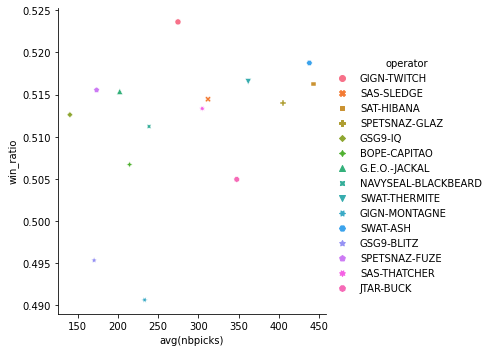

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

#ATT_operators_grap=df_spark_ratio_ATK[["operator","win_ratio","nbpicks"]].sort_values(by='win_ratio' ,ascending=False).groupby(['operator'], as_index=False)
sns.relplot(x="avg(nbpicks)", y="win_ratio", hue="operator", style='operator', data=df_pd_ATK_pickrate)
plt.show()



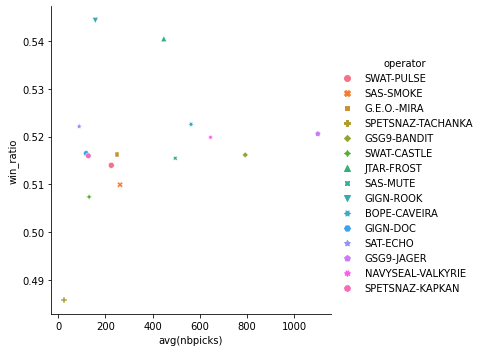

In [395]:
sns.relplot(x="avg(nbpicks)", y="win_ratio", hue="operator", style='operator', data=df_pd_DEF_pickrate)
plt.show()

In [396]:
!pip install -U scikit-learn
from sklearn import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [397]:
predict = df_pd["win_ratio"].mean()
errors = predict - df_pd["win_ratio"]
mean_absolute_error = errors.abs().mean()

y = df_pd["win_ratio"]
x = df_pd["k/d_ratio"]

from sklearn.linear_model import LinearRegression
predict = df_pd['win_ratio'].mean()
errors = predict - df_pd['win_ratio']
mean_absolute_error = errors.abs().mean()

#sns.lineplot(x=x, y=predict, color='red')
#sns.scatterplot(x=x, y=y, color='blue')
#mean_absolute_error




In [398]:
#sns.regplot(x, y)

In [399]:

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error
model = LinearRegression()
feature = ['k/d_ratio']
target = ['win_ratio']
X_train = df_pd[feature]
y_train = df_pd[target]
model.fit(X_train, y_train)



LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


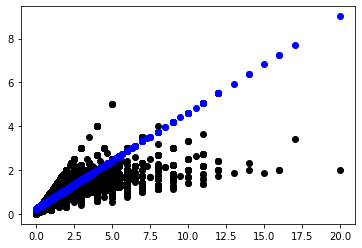

In [400]:
X_test = [[x] for x in df_pd['k/d_ratio']]
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train, color='black', linewidth=1)

plt.scatter(X_test, y_pred, color='blue', linewidth=1);



In [402]:
from sklearn.model_selection import train_test_split
x = df_pd_ATK[["nbwins" ,"nbkills","nbdeaths"]]
y = df_pd_ATK[['win_ratio']]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)
model = LinearRegression()
model = model.fit(x_train, y_train)

y_predict = model.predict(x_test)

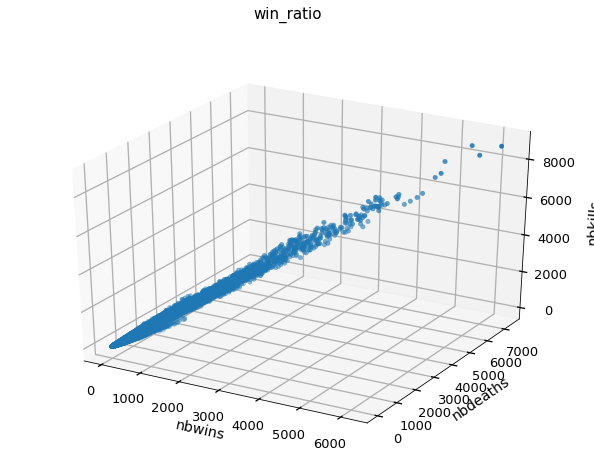

In [425]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(df_pd_ATK['nbwins'],df_pd_ATK['nbdeaths'], df_pd_ATK['nbkills'])
ax.set_xlabel('nbwins', labelpad=12)
ax.set_ylabel('nbdeaths', labelpad=10)
ax.set_zlabel('nbkills', labelpad=20)

plt.suptitle('win_ratio', fontsize=15)
plt.show()